In [1]:
#IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
#IMPORTING DATASET "Continuous Annual Average Daily Traffic 2010 to 2017"
df= pd.read_csv('one.csv', sep=';',header='infer')

In [3]:
df.head(5)

,Section ID,STD Street,Block Num,Direction,Year,Day of Week,AADW,Hr Cnt,X,Y,Longitude,Latitude,geopoint
0,166.0,W GEORGIA ST,1900.0,E,2016.0,Sunday,27213.0,1008.0,490110.9378,5.460155e+06,-123.136005,49.29406,"49.2940601959,-123.136005118"
1,166.0,W GEORGIA ST,1900.0,E,2016.0,Tuesday,32151.0,1080.0,490110.9378,5.460155e+06,-123.136005,49.29406,"49.2940601959,-123.136005118"
2,166.0,W GEORGIA ST,1900.0,W,2016.0,Sunday,29511.0,360.0,490110.9378,5.460155e+06,-123.136005,49.29406,"49.2940601959,-123.136005118"
3,166.0,W GEORGIA ST,1900.0,W,2016.0,Thursday,35317.0,408.0,490110.9378,5.460155e+06,-123.136005,49.29406,"49.2940601959,-123.136005118"
4,166.0,W GEORGIA ST,1900.0,W,2016.0,Saturday,33047.0,504.0,490110.9378,5.460155e+06,-123.136005,49.29406,"49.2940601959,-123.136005118"


In [4]:
#NAME OF THE COLUMNS
df.columns

Index(['Section ID', 'STD Street', 'Block Num', 'Direction', 'Year',
       'Day of Week', 'AADW', 'Hr Cnt', 'X', 'Y', 'Longitude', 'Latitude',
       'geopoint'],
      dtype='object')

In [5]:
#DROPPING USELESS COLUMNS
df=df.drop(['Section ID','Block Num','X','Y','geopoint'],axis=1)


In [6]:
df.head(5)

,STD Street,Direction,Year,Day of Week,AADW,Hr Cnt,Longitude,Latitude
0,W GEORGIA ST,E,2016.0,Sunday,27213.0,1008.0,-123.136005,49.29406
1,W GEORGIA ST,E,2016.0,Tuesday,32151.0,1080.0,-123.136005,49.29406
2,W GEORGIA ST,W,2016.0,Sunday,29511.0,360.0,-123.136005,49.29406
3,W GEORGIA ST,W,2016.0,Thursday,35317.0,408.0,-123.136005,49.29406
4,W GEORGIA ST,W,2016.0,Saturday,33047.0,504.0,-123.136005,49.29406


In [7]:
#SAVING A COPY OF LATITUDE, LONGITUDE AND STREET NAME FOR LATER USE!
df_stmap= df[['STD Street','Latitude','Longitude']]
df_stmap=df_stmap.drop_duplicates()
df_stmap=df_stmap.groupby('STD Street').last().reset_index()

In [8]:
#GRABBING USEFUL FIELDS FOR FURTHER EDA
df1= df[['STD Street','Year','Day of Week',"AADW",'Hr Cnt']]

In [9]:
df1.head()

,STD Street,Year,Day of Week,AADW,Hr Cnt
0,W GEORGIA ST,2016.0,Sunday,27213.0,1008.0
1,W GEORGIA ST,2016.0,Tuesday,32151.0,1080.0
2,W GEORGIA ST,2016.0,Sunday,29511.0,360.0
3,W GEORGIA ST,2016.0,Thursday,35317.0,408.0
4,W GEORGIA ST,2016.0,Saturday,33047.0,504.0


In [10]:
#GROUP BY [A,B,C] TO SUM AADW!
df2=df1.groupby(['STD Street','Year','Hr Cnt']).sum().reset_index()
df2

,STD Street,Year,Hr Cnt,AADW
0,ADANAC ST,2010.0,96.0,3799.0
1,ADANAC ST,2010.0,120.0,3460.0
2,ADANAC ST,2010.0,144.0,7157.0
3,ADANAC ST,2010.0,168.0,5088.0
4,ADANAC ST,2010.0,192.0,4061.0
...,...,...,...,...
1796,W GEORGIA ST,2017.0,576.0,32853.0
1797,W GEORGIA ST,2017.0,600.0,32495.0
1798,W GEORGIA ST,2017.0,624.0,31937.0
1799,W GEORGIA ST,2017.0,672.0,32313.0


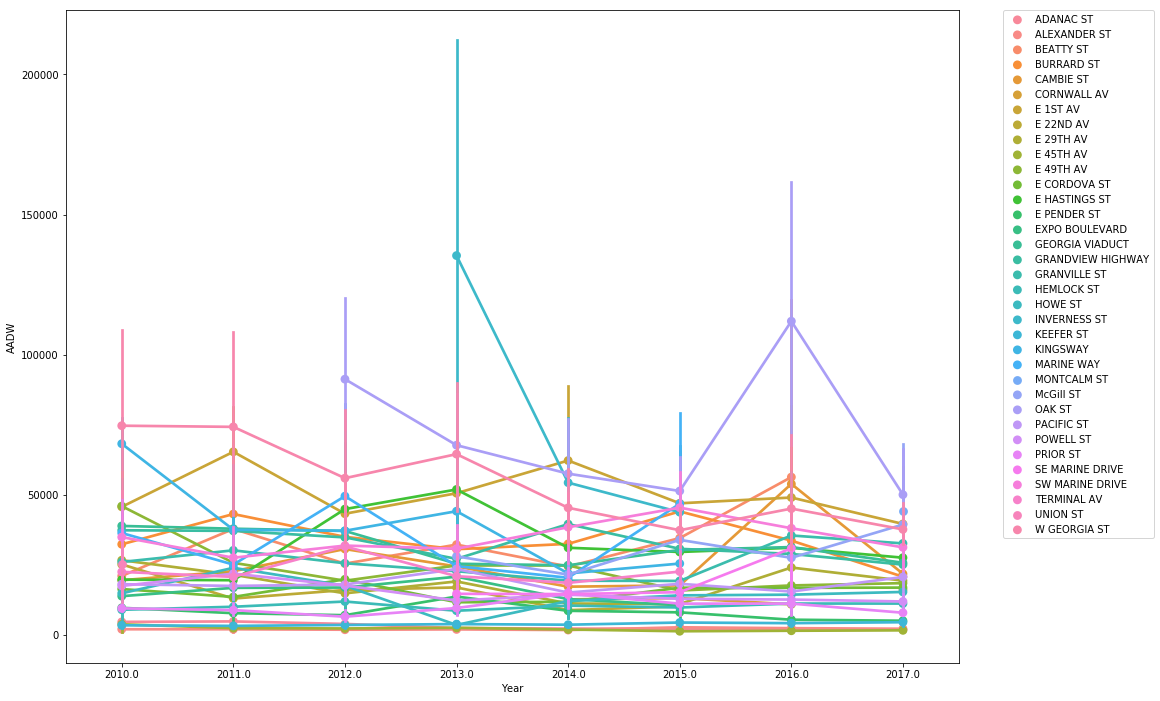

In [11]:
#YEAR VS AADW
plt.figure(figsize=(16,12))
sns.pointplot(x="Year",y="AADW", hue="STD Street",data=df2,legend_out=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
#DATA CLEANING FOR BETTER INSIGHTS!
df3= df2.drop('Year',axis=1)
df3= df3.groupby('STD Street').sum().reset_index()
df3['DailyVol']=df3['AADW']/(8*365)
df3['DailyHr']=df3['Hr Cnt']/(8*365)

In [13]:
df3=df3.drop(['AADW','Hr Cnt'],axis=1)

In [14]:
df3['DailyVolHr']= df3['DailyVol']/df3['DailyHr']
df3['DailyVolDay']=df3['DailyVolHr']*24

In [15]:
df3=df3.drop(['DailyVol','DailyHr','DailyVolHr'],axis=1)


In [16]:

df3.iplot(kind='bar',x='STD Street',y='DailyVolDay',xTitle='Street Names',yTitle='Average Daily Volume')

Text(0.5,1,'AADW vs Day of Week')

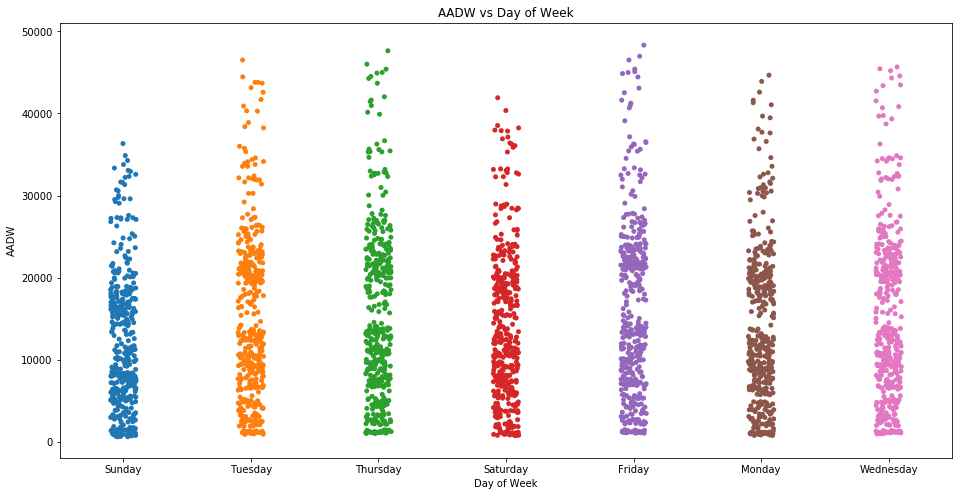

In [17]:
plt.figure(figsize=(16,8))
sns.stripplot(data=df1,y='AADW',x='Day of Week')
plt.title('AADW vs Day of Week')
#  => Friday is the busiest

In [18]:
# => Number of unique streets in the data!
df['STD Street'].nunique()

35

In [19]:
# => Checking for missing values! Voila! No missing values in the dataset!
df.count()

STD Street     3084
Direction      3084
Year           3084
Day of Week    3084
AADW           3084
Hr Cnt         3084
Longitude      3084
Latitude       3084
dtype: int64

In [20]:
df.describe()

,Year,AADW,Hr Cnt,Longitude,Latitude
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,2013.620947,14257.718223,704.264591,-119.049311,47.646954
std,2.180018,9767.491008,265.832683,21.909495,8.768828
min,2010.000000,593.000000,24.000000,-123.186169,0.000000
25%,2012.000000,6624.250000,552.000000,-123.126995,49.232099
50%,2014.000000,12521.000000,768.000000,-123.097158,49.269474
75%,2015.000000,20760.500000,912.000000,-123.025784,49.279505
max,2017.000000,48327.000000,1176.000000,0.000000,49.294060


In [21]:
# => contains all the weekdays!!
df['Day of Week'].nunique()

7

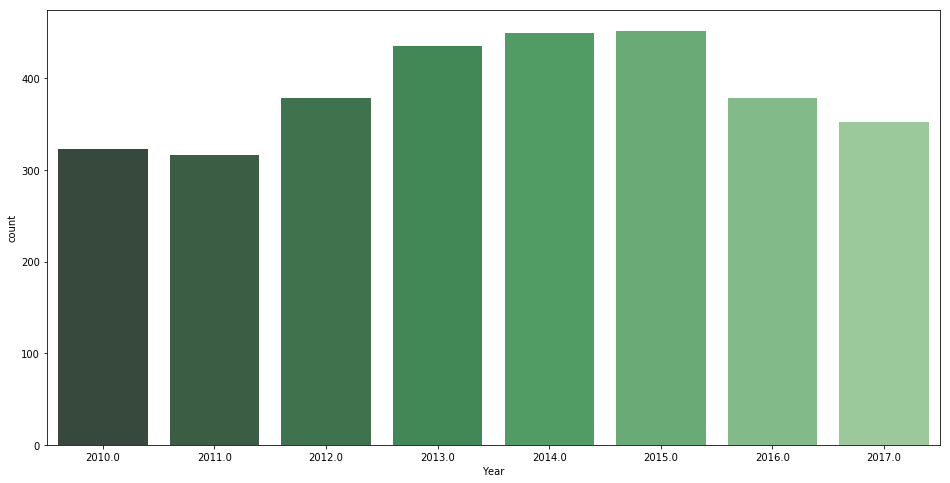

In [22]:
plt.figure(figsize=(16,8))
sns.countplot(x="Year",data=df,palette='Greens_d')

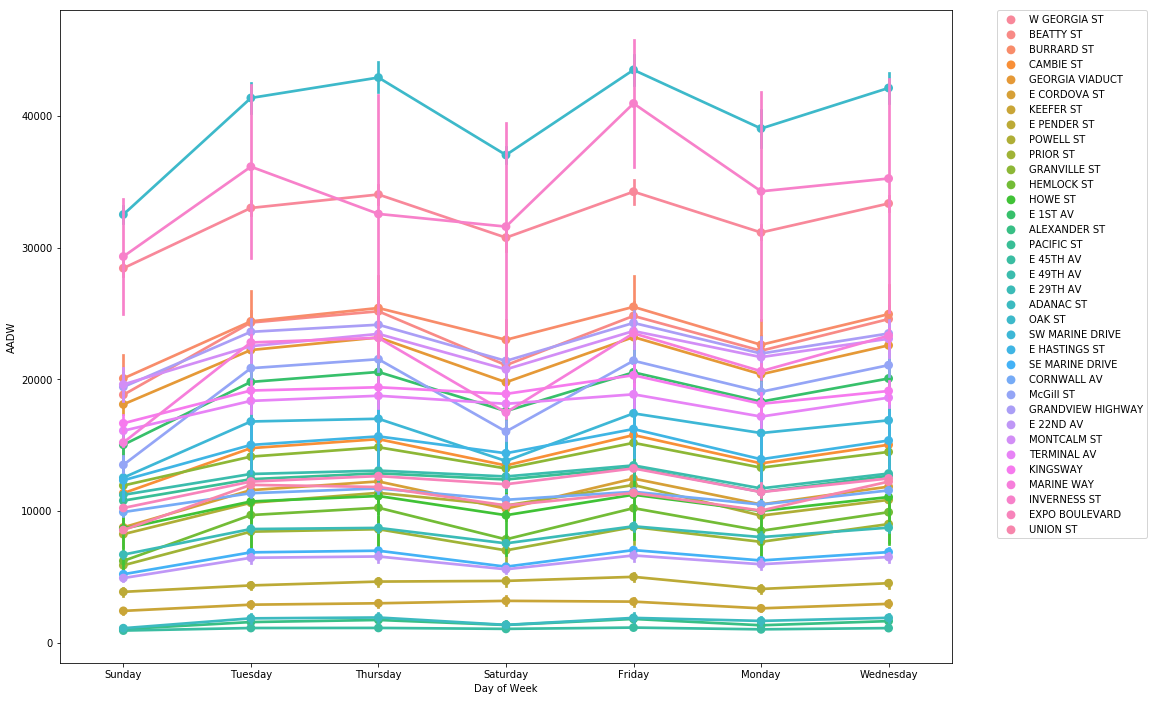

In [23]:
# PLOT : AADW VS DAY OF WEEK ! HUE= 'STREET NAMES'
plt.figure(figsize=(16,12))
sns.pointplot(x="Day of Week",y="AADW", hue="STD Street",data=df,legend_out=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [24]:
df['Year'].iplot(kind='hist', xTitle='Year',yTitle='count', title='Number of Observation in an Year')

In [25]:
df.iplot(
    x='Day of Week',
    y='AADW',
    categories='STD Street',
    xTitle='Days',
    yTitle='AADW',
    title='Day vs AADW ( Average Annual Day of Week)')

Text(0.5,1,' AADW vs Year [ Based on Day of Week]')

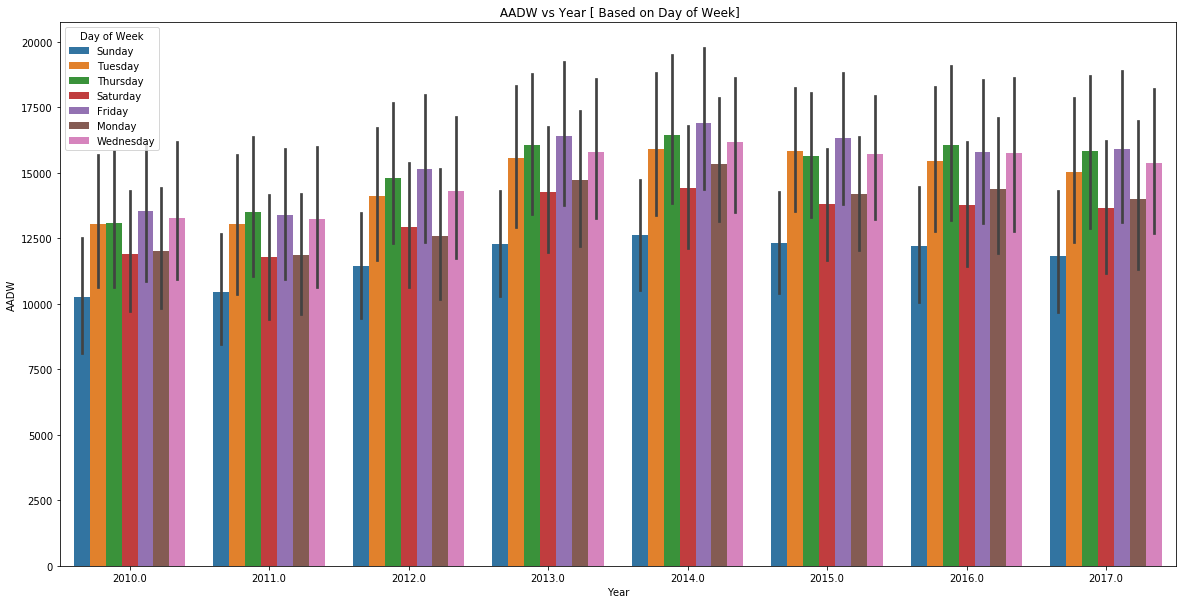

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='AADW',data=df,hue='Day of Week')
#AADW vs Year based on Day of Week! 
#conclusion --> Sunday is the least busiest and friday is the busiest!
plt.title(" AADW vs Year [ Based on Day of Week]")

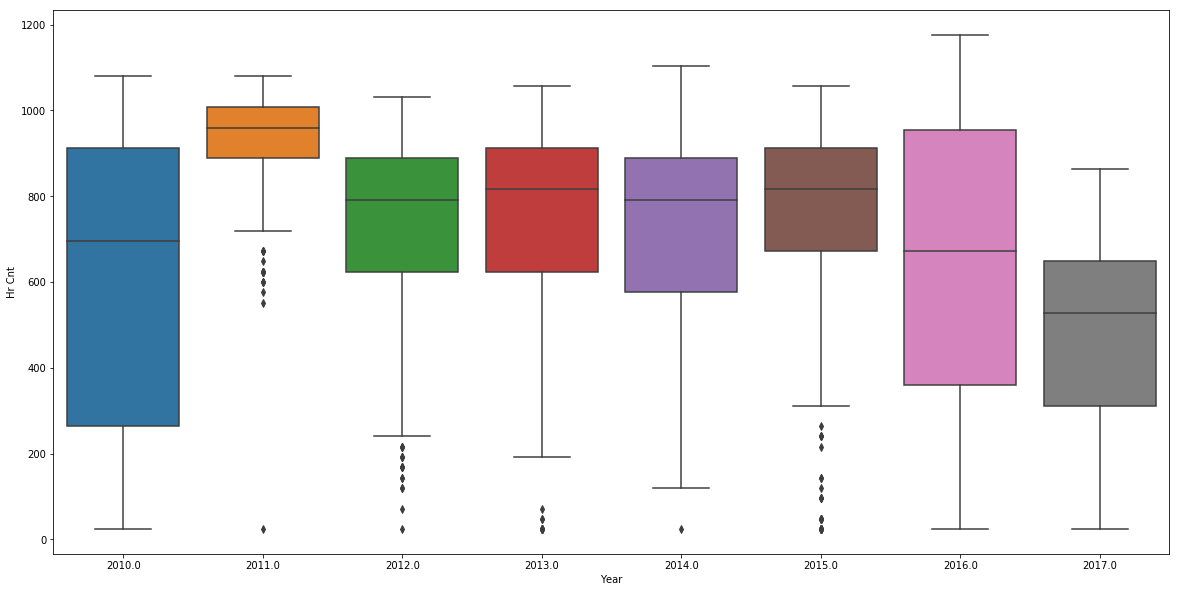

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Year',y='Hr Cnt',data=df)
# => shows that data for congestion was noted for the most number of hours in 2010

In [28]:

df.iplot(kind='bar',x='Year',y='AADW',color='red')

In [37]:
df_stmap.head(10)

,STD Street,Latitude,Longitude
0,ADANAC ST,49.277428,-123.024652
1,ALEXANDER ST,49.284079,-123.098694
2,BEATTY ST,49.276001,-123.116369
3,BURRARD ST,49.276494,-123.133089
4,CAMBIE ST,49.265310,-123.114742
5,CORNWALL AV,49.272442,-123.146490
6,E 1ST AV,49.269461,-123.032328
7,E 22ND AV,49.250644,-123.024985
8,E 29TH AV,49.244512,-123.024816
9,E 45TH AV,49.229234,-123.025000


In [30]:
df_stmap.count()

STD Street    35
Latitude      35
Longitude     35
dtype: int64

In [31]:
df3.count()

STD Street     35
DailyVolDay    35
dtype: int64

In [36]:
df4=pd.merge(df_stmap, df3, on='STD Street', how='inner')
df4=df4.sort_values(by='DailyVolDay',ascending=False)
df4.head(10)

,STD Street,Latitude,Longitude,DailyVolDay
33,UNION ST,0.000000,0.000000,6378.666667
20,INVERNESS ST,0.000000,0.000000,3749.172414
26,OAK ST,49.207693,-123.130272,2473.925241
24,MONTCALM ST,49.204132,-123.136634,1947.855346
6,E 1ST AV,49.269461,-123.032328,1890.871518
34,W GEORGIA ST,49.294060,-123.136005,1585.523118
16,GRANDVIEW HIGHWAY,49.258169,-123.026515,1513.576021
31,SW MARINE DRIVE,49.230922,-123.186169,1394.170603
3,BURRARD ST,49.276494,-123.133089,1281.898813
23,MARINE WAY,49.207295,-123.037891,1209.477241


In [44]:
# MAP GENERATOR FOR TOP MOST 15 CONGESTED STREETS IN VANCOUVER!
import folium
global m

m= folium.Map(location=[49.24966, -123.11934],zoom_start=10)
def mark_all_station(index,lat,long,name):
    tooltip=name
    color='blue'
    
    folium.CircleMarker(location=[lat,long],radius=50,tooltip=tooltip,fill=True,fill_color=color).add_to(m)

    m.save('congested_road.html')
    
count=1    
for index, row in df_stmap.iterrows():
    if count==1:
        mark_all_station(count,49.2825151,-123.015668,row['STD Street'])
    elif count==2:
        mark_all_station(count,49.2339017,-123.0819535,row['STD Street'])
    else:
        mark_all_station(count,row['Latitude'], row['Longitude'],row['STD Street'])
    count=count+1
    if count>15:
        break